In [2]:
# Begin with a deterministic ODE solver for a simple SIR model
# Source: https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 0.1
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

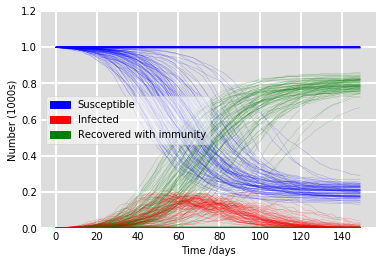

In [3]:
# Generate stochastic SIR curves based on the same parameters of beta and gamma

from numpy.random import poisson as pois
import sys

s0 = 999
i0 = 1
r0 = 0

b = 0.2
y = 0.1

num_sims = 1000
sim_days = 150

def SIR_step(S, I, R, beta, gamma):
    N = S+I+R
    infection = beta * (S * I ) / N
    recovery = gamma * I
        
    num_infections = pois(infection)
    num_recovered = pois(recovery)
    
    if num_infections > S:
        num_infections = S
    if num_recovered > I:
        num_recovered = I
    
    S -= num_infections
    I += num_infections - num_recovered
    R += num_recovered
        
    if S + I + R != N:
        print(S)
        print(I)
        print(R)
        print(num_infections)
        print(num_recovered)
        print("something is rotten"); sys.exit()
        
    return S, I, R

def simulate_infections(days, S, I, R, beta, gamma):
    
    Sout = days*[0]
    Iout = days*[0]
    Rout = days*[0]
    
    for i in range(days):
        S, I, R = SIR_step(S, I, R, beta, gamma)
        Sout[i] = S
        Iout[i] = I
        Rout[i] = R
        
    return Sout, Iout, Rout


fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

t = range(sim_days)
for i in t:
    Scurve, Icurve, Rcurve = simulate_infections(sim_days, s0, i0, r0, b, y)
    ax.plot(np.array(t), np.array(Scurve)/1000, 'b', alpha=0.5, lw=.25)
    ax.plot(np.array(t), np.array(Icurve)/1000, 'r', alpha=0.5, lw=.25)
    ax.plot(np.array(t), np.array(Rcurve)/1000, 'g', alpha=0.5, lw=.25)

S_patch = mpatches.Patch(color='blue', label='Susceptible')
I_patch = mpatches.Patch(color='red', label='Infected')
R_patch = mpatches.Patch(color='green', label='Recovered with immunity')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(handles=[S_patch, I_patch, R_patch])
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [37]:
# Generate labelled test data 
import tensorflow as tf
